In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('data.csv')

In [33]:
df.head()

,Drug,Mean Physical harm + Mean Dependence,Mean Physical harm[1],Median Physical harm[2],MeanNA=0 Physical harm[3],Acute harm,Chronic harm,Intravenous harm,Mean Dependence,Pleasure,Psychological,Physical,Mean Social harm,Intoxication,Social harm,Health-care costs
0,Heroin,5.78,2.78,2.80,2.78,2.8,2.5,3.0,3.00,3.0,3.0,3.0,2.54,1.6,3.0,3.0
1,Cocaine,4.72,2.33,2.00,2.33,2.0,2.0,3.0,2.39,3.0,2.8,1.3,2.17,1.8,2.5,2.3
2,Barbiturates,4.24,2.23,2.30,2.23,2.3,1.9,2.5,2.01,2.0,2.2,1.8,2.00,2.4,1.9,1.7
3,Tobacco,4.11,1.90,1.90,1.24,0.9,2.9,NaN,2.21,2.3,2.6,1.8,1.42,0.8,1.1,2.4
4,Alcohol,4.08,2.15,2.15,1.40,1.9,2.4,NaN,1.93,2.3,1.9,1.6,2.21,2.2,2.4,2.1


In [34]:
df.drop(['Median Physical harm[2]', 'MeanNA=0 Physical harm[3]', 'Social harm'], axis=1, inplace=True)

In [41]:
df2 = df[['Mean Physical harm[1]', 'Mean Dependence', 'Mean Physical harm + Mean Dependence', 'Mean Social harm', 'Acute harm', 'Chronic harm', 'Intravenous harm', 'Pleasure', 'Psychological', 'Physical', 'Intoxication', 'Health-care costs']].copy()

In [78]:
corr = df2.corr()

In [79]:
corr

,Mean Physical harm[1],Mean Dependence,Mean Physical harm + Mean Dependence,Mean Social harm,Acute harm,Chronic harm,Intravenous harm,Pleasure,Psychological,Physical,Intoxication,Health-care costs
Mean Physical harm[1],1.000000,0.780943,0.936728,0.818009,0.724181,0.730548,0.874870,0.551353,0.796132,0.673479,0.560070,0.732490
Mean Dependence,0.780943,1.000000,0.950144,0.863400,0.500209,0.651015,0.736590,0.812714,0.964814,0.887957,0.383222,0.913472
Mean Physical harm + Mean Dependence,0.936728,0.950144,1.000000,0.891879,0.639994,0.730393,0.819537,0.729978,0.938391,0.833852,0.495311,0.876050
Mean Social harm,0.818009,0.863400,0.891879,1.000000,0.661145,0.555435,0.724224,0.792459,0.792464,0.745582,0.721470,0.835336
Acute harm,0.724181,0.500209,0.639994,0.661145,1.000000,0.219759,0.291255,0.357984,0.464878,0.459296,0.554122,0.460991
Chronic harm,0.730548,0.651015,0.730393,0.555435,0.219759,1.000000,0.741690,0.448120,0.701866,0.537482,0.229218,0.698754
Intravenous harm,0.874870,0.736590,0.819537,0.724224,0.291255,0.741690,1.000000,0.539018,0.762141,0.639297,0.507317,0.642796
Pleasure,0.551353,0.812714,0.729978,0.792459,0.357984,0.448120,0.539018,1.000000,0.737703,0.525347,0.350118,0.809682
Psychological,0.796132,0.964814,0.938391,0.792464,0.464878,0.701866,0.762141,0.737703,1.000000,0.813272,0.351625,0.847298
Physical,0.673479,0.887957,0.833852,0.745582,0.459296,0.537482,0.639297,0.525347,0.813272,1.000000,0.329804,0.811444


In [85]:
columns = [
    'Mean Physical Harm',
    'Mean Dependence',
    'Mean Physical Harm + Mean Dependence',
    'Mean Social Harm',
    'Acute Harm',
    'Chronic Harm',
    'Intravenous Harm',
    'Pleasure',
    'Psychological',
    'Physical',
    'Intoxication',
    'Health-Care Costs']

corr.columns = columns
corr.index = columns

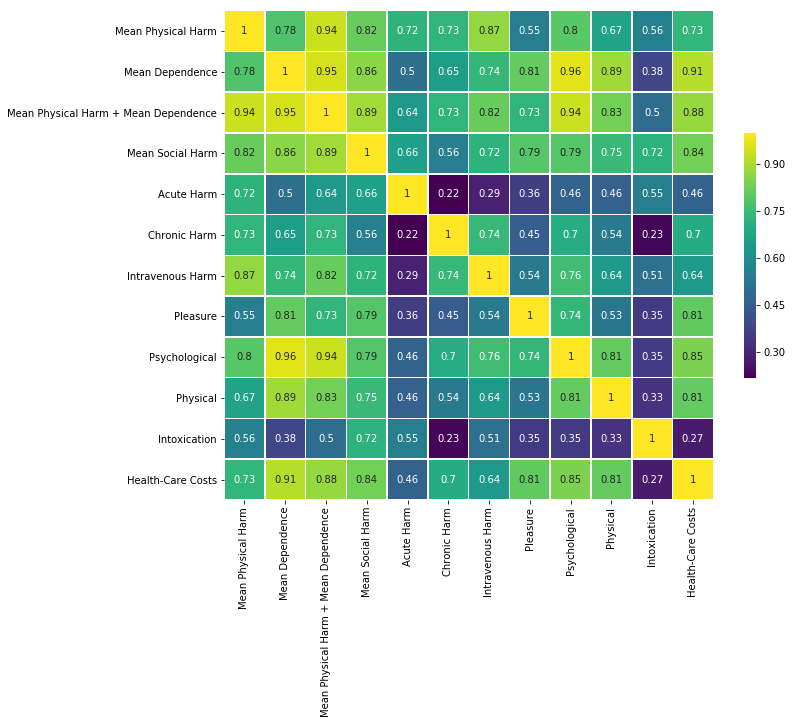

In [100]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
fig = sns.heatmap(corr,  square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, cmap='viridis')
plt.show()